In [1]:
import matplotlib.pyplot as plt

# Data
precision = {
    1: 0.15033112582781458,
    5: 0.11105960264900662,
    10: 0.10395695364238412,
    15: 0.10562913907284768,
    20: 0.10100993377483444,
    25: 0.09577483443708609,
    40: 0.08688741721854304,
    50: 0.08455960264900664
}

ncdg = {
    1: 0.15033112582781458,
    5: 0.11751915451471905,
    10: 0.10714419137650094,
    15: 0.10667343187422693,
    20: 0.1031976903034765,
    25: 0.09975304311552119,
    40: 0.09582025169542635,
    50: 0.09642340042377161
}

recall = {
    1: 0.0023986459642478097,
    5: 0.008859112443857658,
    10: 0.017141557661585087,
    15: 0.025418962488945873,
    20: 0.032558052616898356,
    25: 0.03845672056319297,
    40: 0.055988397177233314,
    50: 0.0669302729963809
}

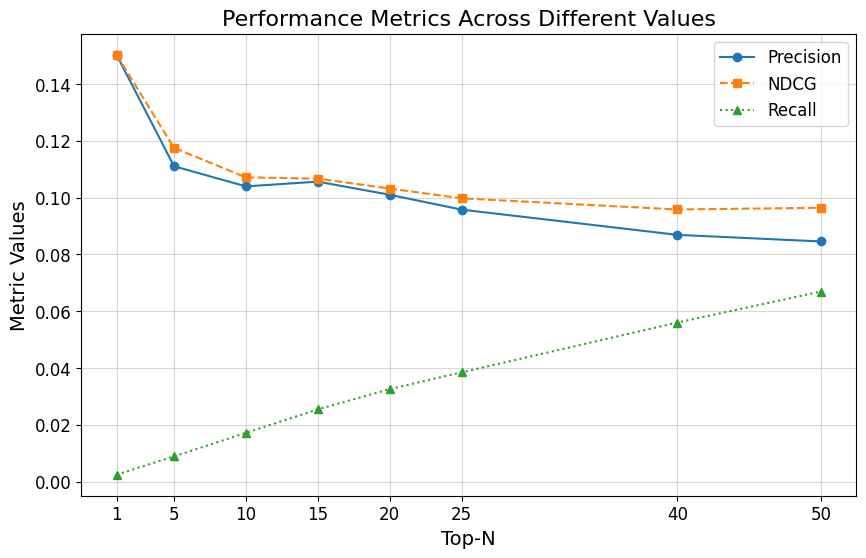

In [2]:

plt.figure(figsize=(10, 6))

plt.plot(precision.keys(), precision.values(),
         marker='o', label='Precision', linestyle='-')
plt.plot(ncdg.keys(), ncdg.values(), marker='s', label='NDCG', linestyle='--')
plt.plot(recall.keys(), recall.values(),
         marker='^', label='Recall', linestyle=':')

# Labels and Title
plt.title('Performance Metrics Across Different Values', fontsize=16)
plt.xlabel('Top-N', fontsize=14)
plt.ylabel('Metric Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(list(precision.keys()), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [10]:
import pandas as pd
precision_cbf = {
    1: 0.15033112582781458,
    5: 0.11105960264900662,
    10: 0.10395695364238412,
    15: 0.10562913907284768,
    20: 0.10100993377483444,
    25: 0.09577483443708609,
    40: 0.08688741721854304,
    50: 0.08455960264900664
}
precision = {
    1: 0.33133112582781458,
    5: 0.33405960264900662,
    10: 0.31895695364238412,
    15: 0.30362913907284768,
    20: 0.2894,
    25: 0.277777,
    40: 0.250288741721854304,
    50: 0.23775960264900664
}
#  {1: 0.46, 5: 0.35400000000000004, 10: 0.2900000000000001, 15: 0.27399999999999997,
#                     20: 0.2615, 25: 0.24679999999999994, 40: 0.22075, 50: 0.20439999999999997}
precision_hybrid = {1: 0.46, 5: 0.36200000000000004, 10: 0.34700000000000003, 15: 0.3253333333333331, 20: 0.3025000000000001,
                    25: 0.2847999999999998, 40: 0.25625, 50: 0.2433999999999998}
precision_ncf = pd.read_csv('./metrics_results.csv')
precision_ncf = precision_ncf['Precision']
print(precision_ncf.values)

[0.29143898 0.33141249 0.27203179 0.26423801 0.25768339 0.2654148
 0.23385494 0.21390628]


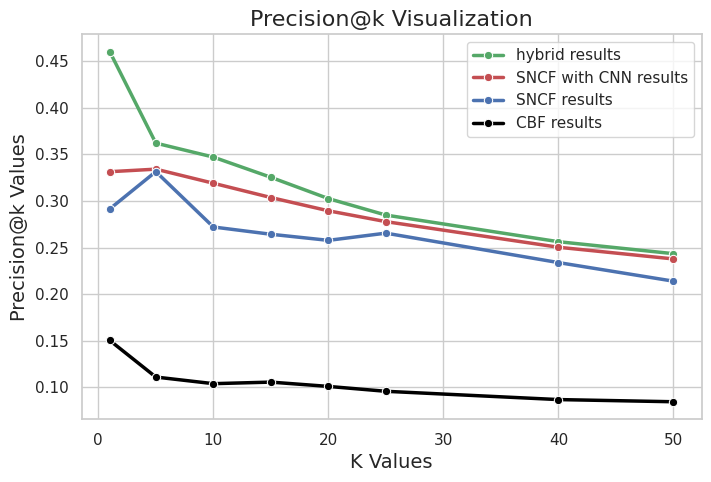

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data

# Preparing data for plotting
x = list(precision.keys())
y = list(precision.values())
y_cbf = list(precision_cbf.values())
y_ncf = list(precision_ncf)
y_hybrid = list(precision_hybrid.values())

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=y_hybrid, marker='o', linewidth=2.5,
             color='g', label='hybrid results')
sns.lineplot(x=x, y=y, marker='o', linewidth=2.5,
             color='r', label='SNCF with CNN results')
sns.lineplot(x=x, y=y_ncf, marker='o', linewidth=2.5,
             color='b', label='SNCF results')
sns.lineplot(x=x, y=y_cbf, marker='o', linewidth=2.5,
             color='black', label='CBF results')


# Add titles and labels
plt.title("Precision@k Visualization", fontsize=16)
plt.xlabel("K Values", fontsize=14)
plt.ylabel("Precision@k Values", fontsize=14)

# Show the plot
plt.show()

/tmp/ipykernel_5032/2616753894.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=['b', 'r'])


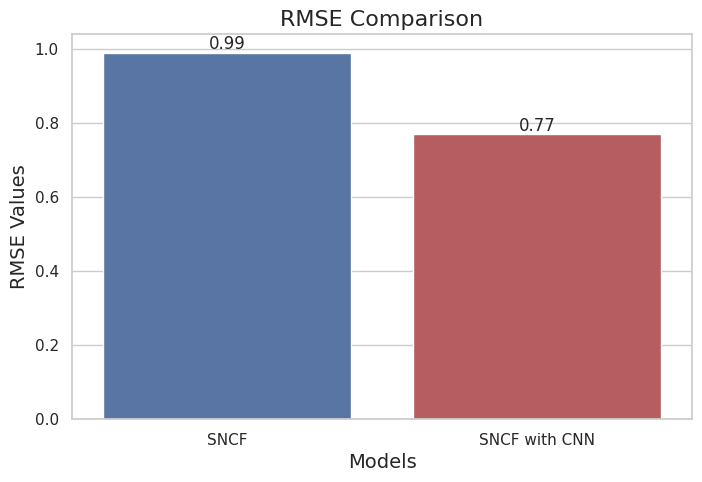

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
labels = ['SNCF',
          'SNCF with CNN']
# Replace with actual values
values = [0.9910498802296513, 0.77]

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values, palette=['b', 'r'])

# Add titles and labels
plt.title("RMSE Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("RMSE Values", fontsize=14)

# Add value annotations on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

# Show the plot
plt.show()

In [ ]:
from docx import Document
import pandas as pd
import docx


def df_to_word(data: dict, report_name: str) -> docx.Document:
    assert type(data) == dict, 'data has to be dict'
    assert '.docx' in report_name, 'report_name has to be a .docx file'
    df = pd.DataFrame(data)
    doc = docx.Document()

    table = doc.add_table(df.shape[0]+1, df.shape[1])

    for j in range(df.shape[-1]):
        table.cell(0, j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            table.cell(i+1, j).text = str(df.values[i, j])

    doc.save(f'./{report_name}')


data = {
    "K": complete_rmse.keys(),
    "NCF with RMSE": [0.29143898 0.33141249 0.27203179 0.26423801 0.25768339 0.2654148
 0.23385494 0.21390628]
,
}
df_to_word(data, 'report_4.docx')

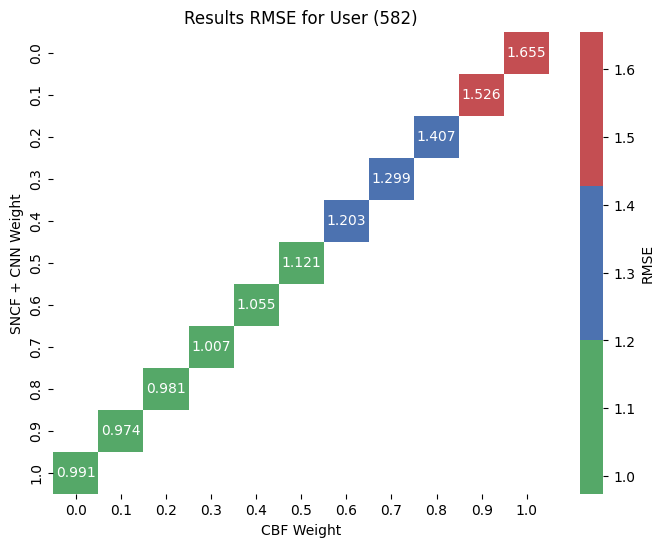

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert data into a DataFrame
data = [
    (0.0, 1.0, 1.6551545878134617),
    (0.1, 0.9, 1.526250861068207),
    (0.2, 0.8, 1.407184724483647),
    (0.3, 0.7, 1.2994061185368122),
    (0.4, 0.6, 1.2028644635133918),
    (0.5, 0.5, 1.1207184373895223),
    (0.6, 0.4, 1.0552551501940701),
    (0.7, 0.3, 1.0073462359285363),
    (0.8, 0.2, 0.9808892192950792),
    (0.9, 0.1, 0.9739669588081202),
    (1.0, 0.0, 0.9910498802296513),
]
df = pd.DataFrame(data, columns=["x", "y", "value"])

# Pivot the data to make it suitable for a heatmap
heatmap_data = df.pivot(index="x", columns="y", values="value")
# custom_cmap = sns.color_palette(["r", "g", "b", "black"])


plt.figure(figsize=(8, 6))

sns.heatmap(heatmap_data, annot=True, fmt=".3f",
            cmap=['#55a868',  '#4c72b0', '#c44e52'], cbar_kws={'label': 'RMSE'})

plt.title("Results RMSE for User (582)")
plt.xlabel("CBF Weight")
plt.ylabel("SNCF + CNN Weight")
plt.show()